In [ ]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('StrawberryReading.xlsx')

# Display the first few rows of the dataframe
print(df.head())

  Sensor           timestamp   temp  humi
0  0475C 2024-04-16 13:11:00  20.55  55.9
1  0475C 2024-04-16 13:16:00  24.50  37.1
2  0475C 2024-04-16 13:21:00  24.50  33.0
3  0475C 2024-04-16 13:26:00  24.20  33.9
4  0475C 2024-04-16 13:31:00  23.85  34.8


Data Preprocessing

In [ ]:
# Check data types after conversion
print(df.dtypes)

Sensor               object
timestamp    datetime64[ns]
temp                float64
humi                float64
dtype: object


In [ ]:
import pandas as pd

# Attempt to convert the 'timestamp' column to datetime, handling errors
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for and handle any missing values (NaT) introduced by the conversion
print(df['timestamp'].isnull().sum())  # Count missing values

# If there are missing values, investigate the original data in those rows
# to understand why they couldn't be converted. You might need to clean
# or reformat the data in the Excel file.

# Convert temp and humi columns to float, handling potential errors
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['humi'] = pd.to_numeric(df['humi'], errors='coerce')

# Check the data types of the columns
print(df.dtypes)

0
Sensor               object
timestamp    datetime64[ns]
temp                float64
humi                float64
dtype: object


In [ ]:
# Print summary statistics for 'temp' and 'humi'
print(df[['temp', 'humi']].describe())

# Check for missing values in the entire DataFrame
print(df.isnull().sum())

               temp          humi
count  49179.000000  49179.000000
mean      16.989973     66.537786
std        6.863786     17.092655
min        6.150000     23.000000
25%       11.150000     51.800000
50%       15.450000     71.500000
75%       22.100000     81.000000
max       39.050000     92.700000
Sensor         0
timestamp      0
temp         181
humi         181
dtype: int64


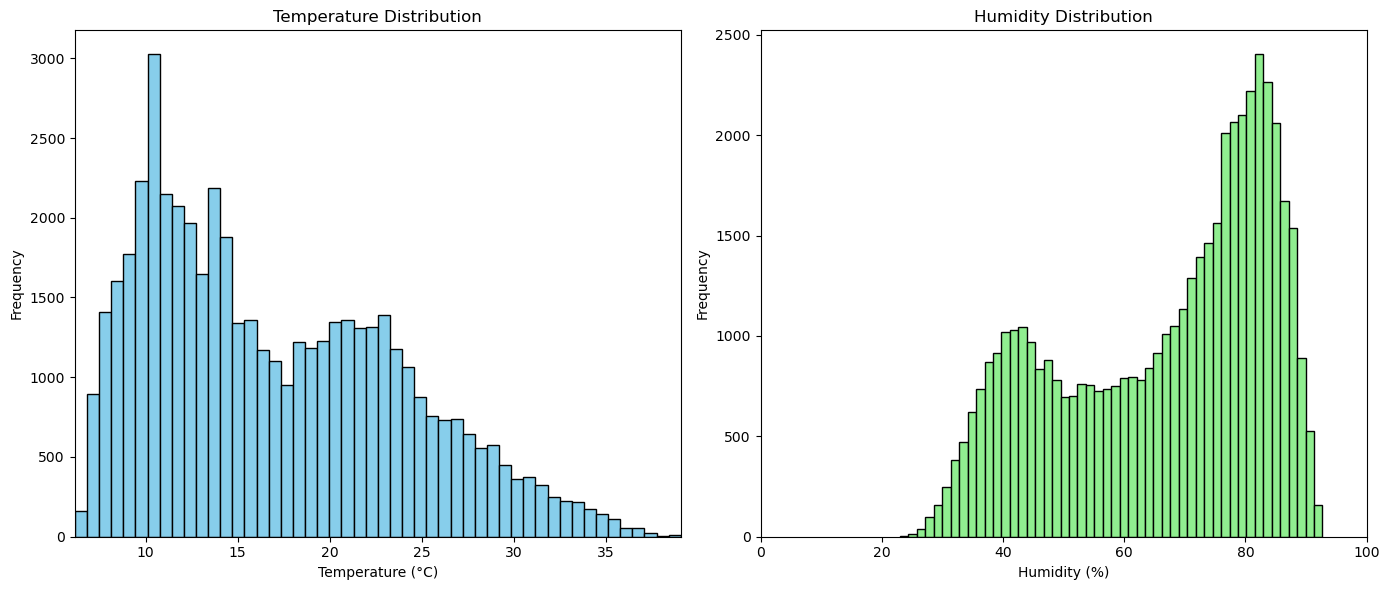

In [ ]:
# Data Preprocessing
import matplotlib.pyplot as plt

# Plot histograms for temperature and humidity
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for temperature
ax[0].hist(df['temp'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Temperature Distribution')
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Frequency')

# Set x-axis limits for temperature to make the scale smaller
# Adjust these values as needed based on the data range
ax[0].set_xlim(df['temp'].min(), df['temp'].max() if df['temp'].max() < 100 else 100)

# Histogram for humidity
ax[1].hist(df['humi'], bins=50, color='lightgreen', edgecolor='black')
ax[1].set_title('Humidity Distribution')
ax[1].set_xlabel('Humidity (%)')
ax[1].set_ylabel('Frequency')

# Set x-axis limits for humidity (if necessary)
# This is just an example; adjust if needed based on the data range
ax[1].set_xlim(0, 100)

plt.tight_layout()
plt.show()


**Data Exploration**

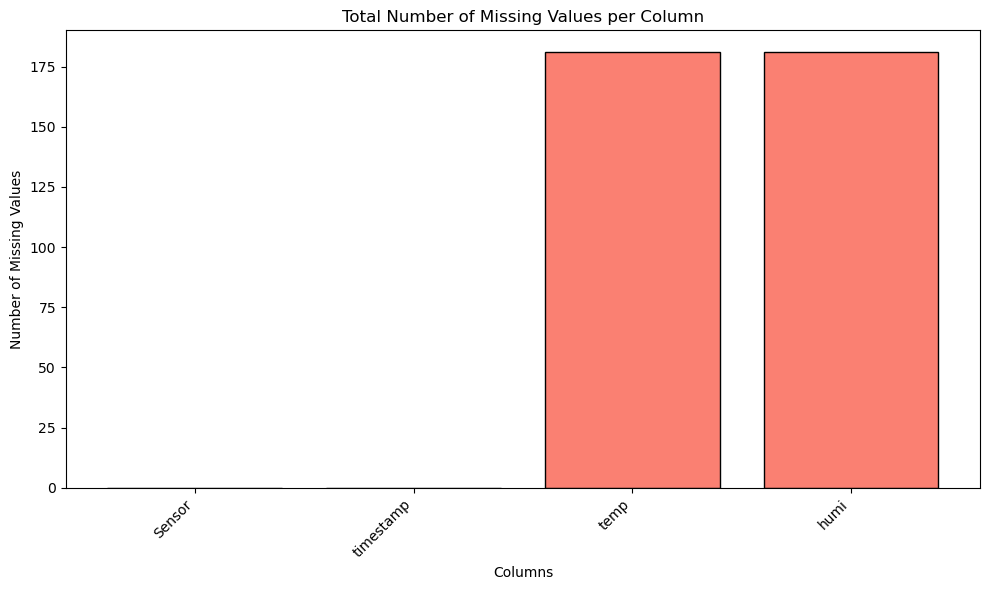

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Calculate total missing values for each column
missing_values = df.isnull().sum()

# Create a new DataFrame for plotting
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

# Plot histogram for missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_df['Column'], missing_df['Missing Values'], color='salmon', edgecolor='black')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Total Number of Missing Values per Column')
plt.xticks(rotation=45, ha='right')  # Rotate column names for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of missing values in each column
missing_values_count = df.isna().sum()

# Print columns with missing cells
columns_with_missing_cells = missing_values_count[missing_values_count > 0].index.tolist()
print("Columns with missing cells:")
print(columns_with_missing_cells)

Columns with missing cells:
['temp', 'humi']


In [ ]:
# Check for missing values in the DataFrame
missing_values_count = df.isna().sum()

# Print columns with missing cells
columns_with_missing_cells = missing_values_count[missing_values_count > 0].index.tolist()
print("Columns with missing cells:")
print(columns_with_missing_cells)

# Identify and print the specific cells that are empty
for column in columns_with_missing_cells:
    missing_cells = df[df[column].isna()]
    print(f"\nMissing values in column '{column}':")
    print(missing_cells)

Columns with missing cells:
['timestamp', 'temp', 'humi']

Missing values in column 'timestamp':
      timestamp    temp  humi
8360        NaT  4750.0   NaN
8361        NaT     NaN   NaN
8362        NaT     NaN   NaN
8363        NaT     NaN   NaN
20503       NaT  4750.0   NaN
20504       NaT     NaN   NaN
20505       NaT     NaN   NaN
20506       NaT     NaN   NaN
32646       NaT  4750.0   NaN
32647       NaT     NaN   NaN
32648       NaT     NaN   NaN
32649       NaT     NaN   NaN
44789       NaT  4757.0   NaN
44790       NaT     NaN   NaN
44791       NaT     NaN   NaN
44792       NaT     NaN   NaN
56934       NaT     NaN   NaN
56935       NaT     NaN   NaN
56936       NaT     NaN   NaN
56937       NaT     NaN   NaN
65298       NaT     NaN   NaN
65299       NaT     NaN   NaN
65300       NaT     NaN   NaN
65301       NaT     NaN   NaN

Missing values in column 'temp':
                timestamp  temp  humi
458   2024-04-18 03:18:00   NaN   NaN
793   2024-04-19 07:12:00   NaN   NaN
812  

        count       mean        std    min    25%    50%   75%    max
temp  49179.0  16.989973   6.863786   6.15  11.15  15.45  22.1  39.05
humi  49179.0  66.537786  17.092655  23.00  51.80  71.50  81.0  92.70


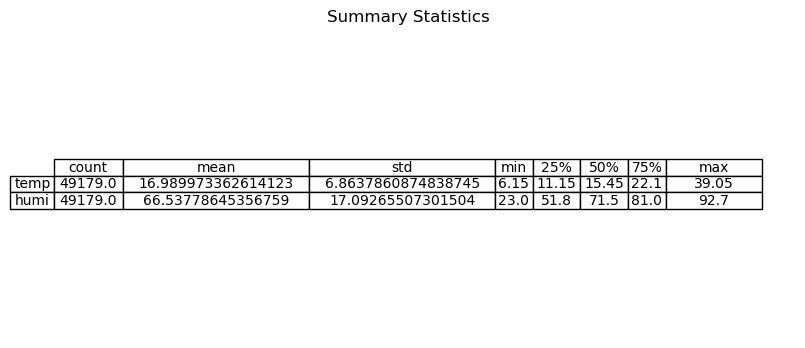

In [ ]:
import pandas as pd

# Create a DataFrame with summary statistics
summary_stats = df[['temp', 'humi']].describe().transpose()
print(summary_stats)

# Optional: Display summary statistics as a table in a plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Create a table with summary statistics
table = ax.table(cellText=summary_stats.values,
                 rowLabels=summary_stats.index,
                 colLabels=summary_stats.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6])

plt.title('Summary Statistics')
plt.show()

**TEMPERATURE OVER TIME**
First research question

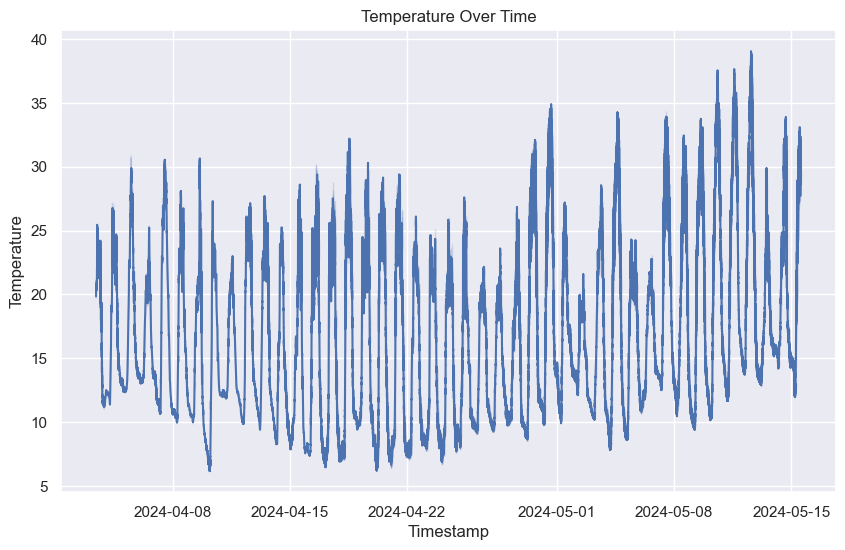

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the index is a column for Seaborn
df.reset_index(inplace=True)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='timestamp', y='temp')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()

**HUMIDITY OVER TIME**

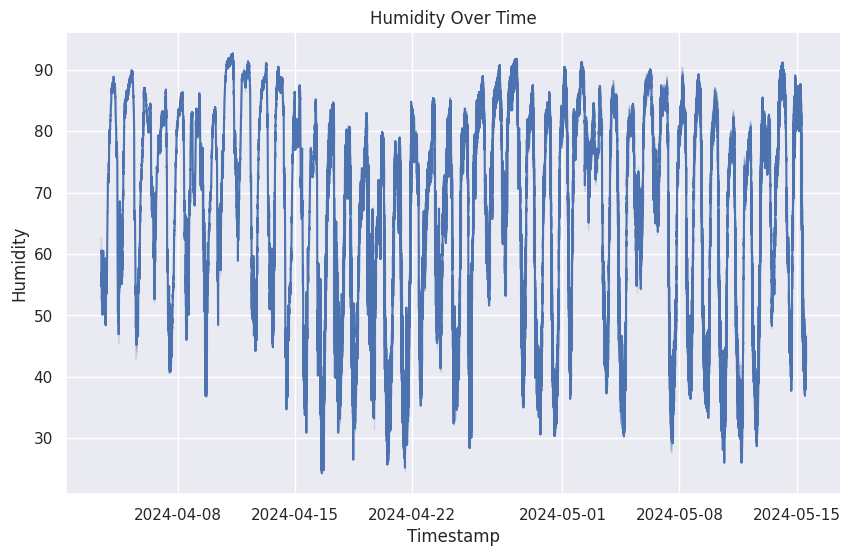

In [ ]:
# Ensure the index is a column for Seaborn
df.reset_index(inplace=True)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='timestamp', y='humi')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.show()

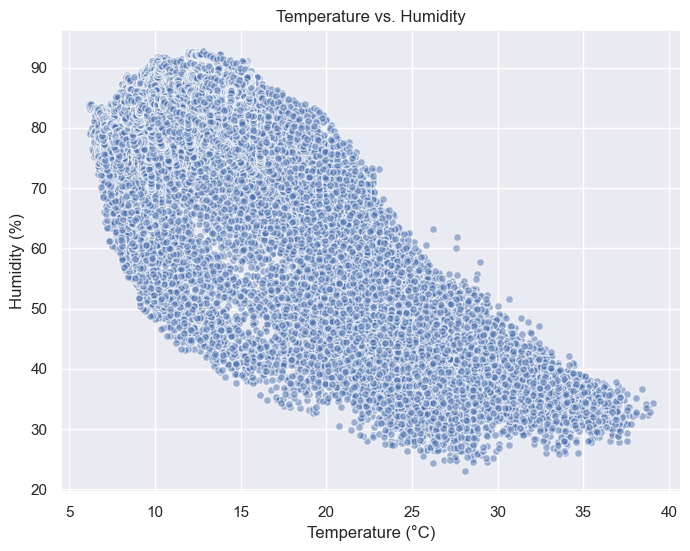

In [ ]:
# Scatter plot of temperature vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['humi'], alpha=0.5, edgecolors='w', s=30)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

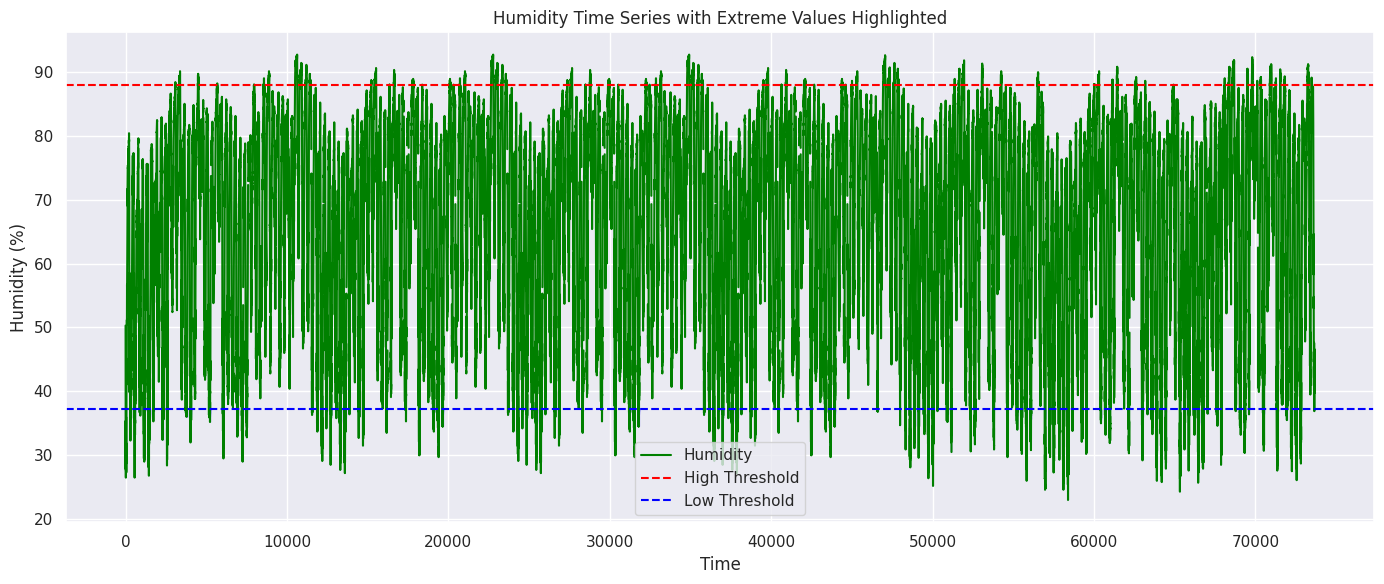

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
humi_threshold_high = df['humi'].quantile(0.95)  # 95th percentile as high threshold
humi_threshold_low = df['humi'].quantile(0.05)   # 5th percentile as low threshold

# Plot humidity
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['humi'], label='Humidity', color='green')
plt.axhline(humi_threshold_high, color='red', linestyle='--', label='High Threshold')
plt.axhline(humi_threshold_low, color='blue', linestyle='--', label='Low Threshold')
plt.fill_between(df.index, humi_threshold_high, df['humi'], where=df['humi'] > humi_threshold_high, color='red', alpha=0.3)
plt.fill_between(df.index, humi_threshold_low, df['humi'], where=df['humi'] < humi_threshold_low, color='blue', alpha=0.3)
plt.title('Humidity Time Series with Extreme Values Highlighted')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


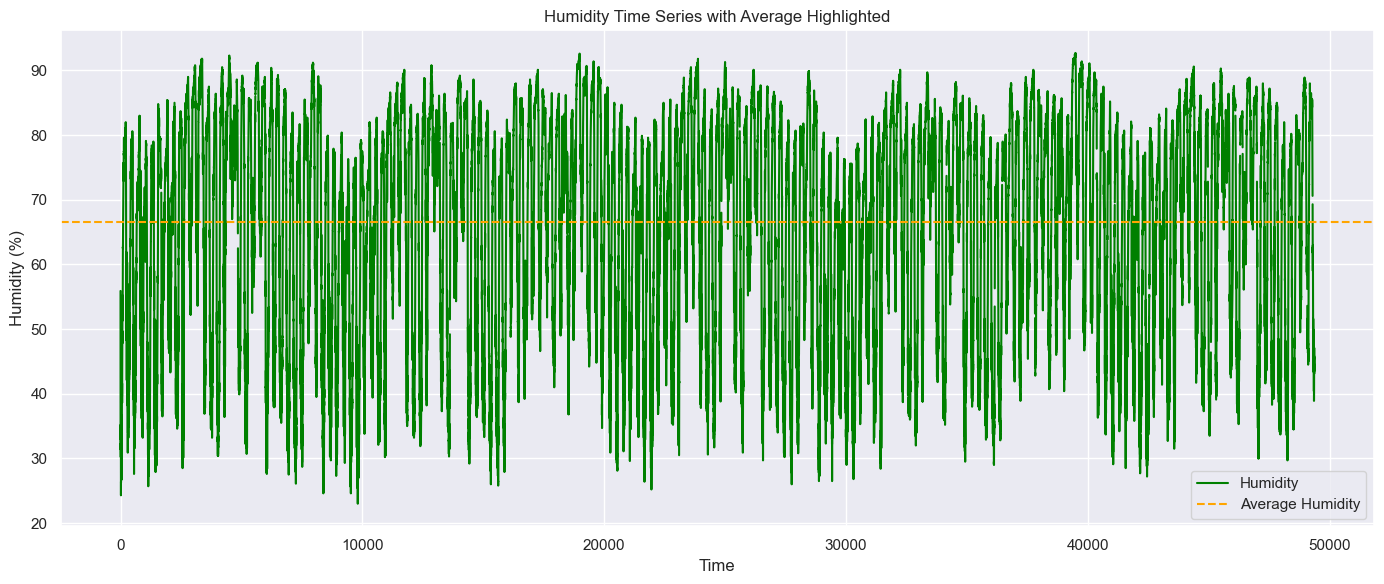

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average humidity
humi_average = df['humi'].mean()

# Plot humidity
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['humi'], label='Humidity', color='green')
plt.axhline(humi_average, color='orange', linestyle='--', label='Average Humidity')
plt.title('Humidity Time Series with Average Highlighted')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Humidity Peaks:
39486    92.7
18981    92.6
39473    92.6
18982    92.5
39459    92.5
39465    92.5
39466    92.5
18975    92.4
18983    92.4
39456    92.4
Name: humi, dtype: float64

Bottom 10 Humidity Troughs:
9810    23.0
18      24.3
8386    24.6
9524    24.6
15      24.7
17      24.8
8403    24.8
8407    24.8
8385    25.0
8402    25.1
Name: humi, dtype: float64


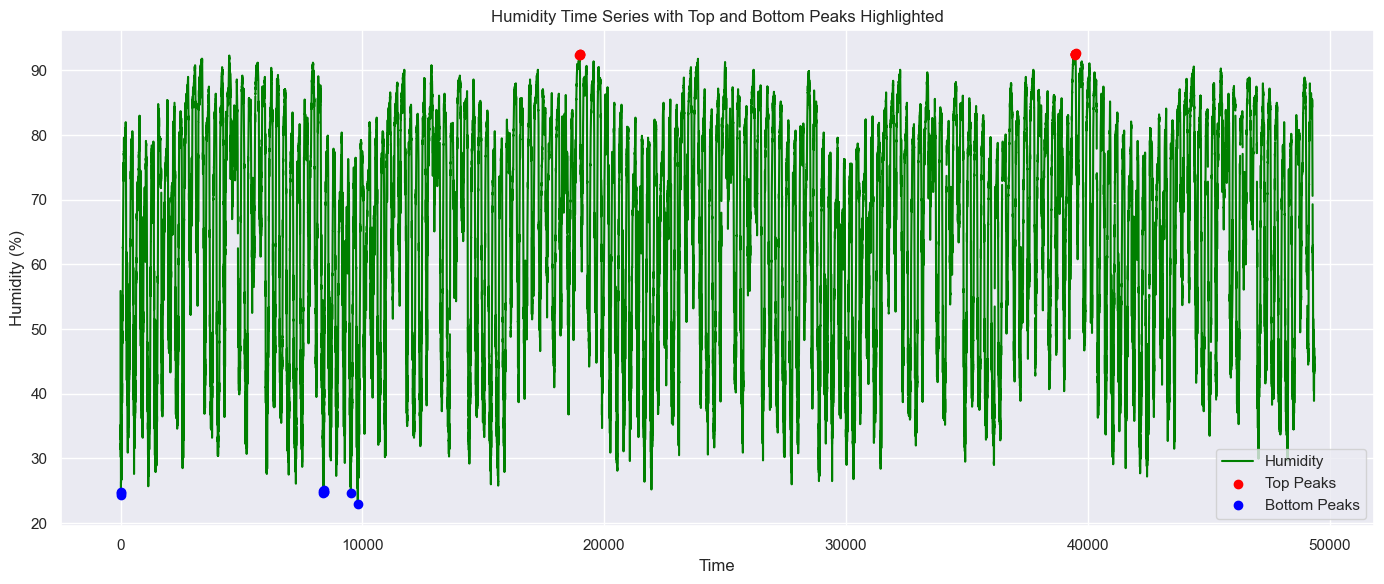

In [ ]:

top_peaks = df['humi'].nlargest(10)
bottom_peaks = df['humi'].nsmallest(10)

print("Top 10 Humidity Peaks:")
print(top_peaks)

print("\nBottom 10 Humidity Troughs:")
print(bottom_peaks)# Plot the humidity data
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['humi'], label='Humidity', color='green')

# Mark the top peaks
plt.scatter(top_peaks.index, top_peaks.values, color='red', label='Top Peaks', zorder=5)

# Mark the bottom peaks
plt.scatter(bottom_peaks.index, bottom_peaks.values, color='blue', label='Bottom Peaks', zorder=5)

# Add titles and labels
plt.title('Humidity Time Series with Top and Bottom Peaks Highlighted')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

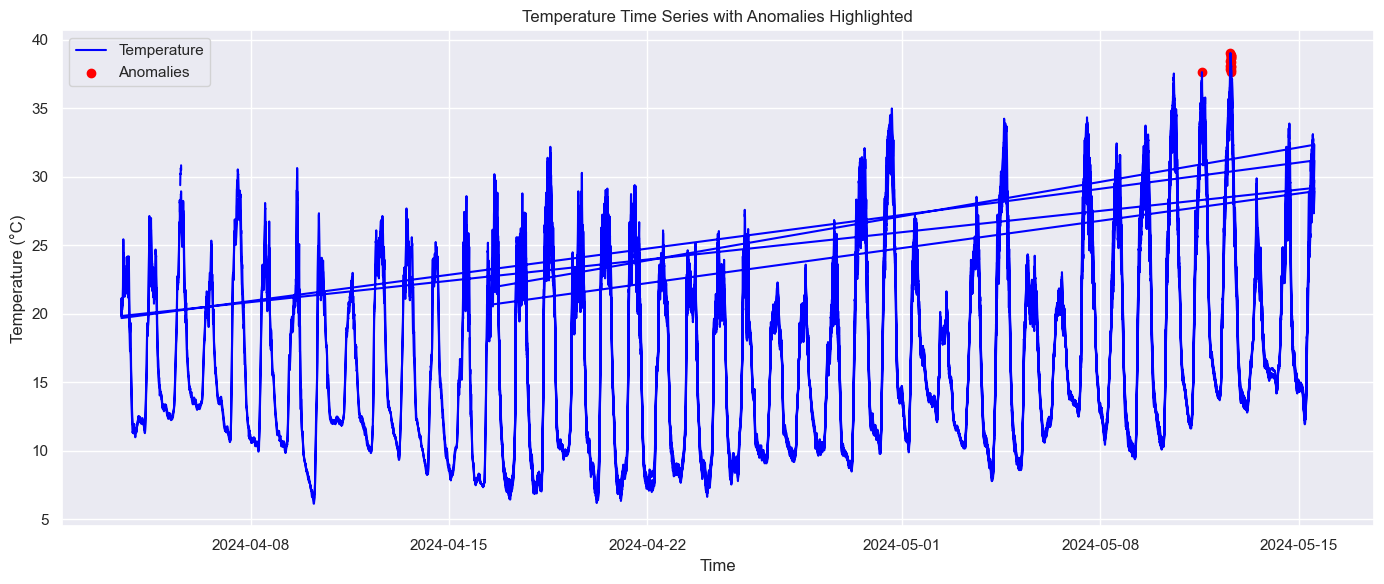

In [ ]:
df['temp_z_score'] = (df['temp'] - df['temp'].mean()) / df['temp'].std()
temp_threshold = 3  # commonly used threshold for anomalies
df['temp_anomaly'] = df['temp_z_score'].apply(lambda x: x if abs(x) > temp_threshold else 0)

plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['temp'], label='Temperature', color='blue')
plt.scatter(df[df['temp_anomaly'] != 0]['timestamp'], df[df['temp_anomaly'] != 0]['temp'], color='red', label='Anomalies')
plt.title('Temperature Time Series with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

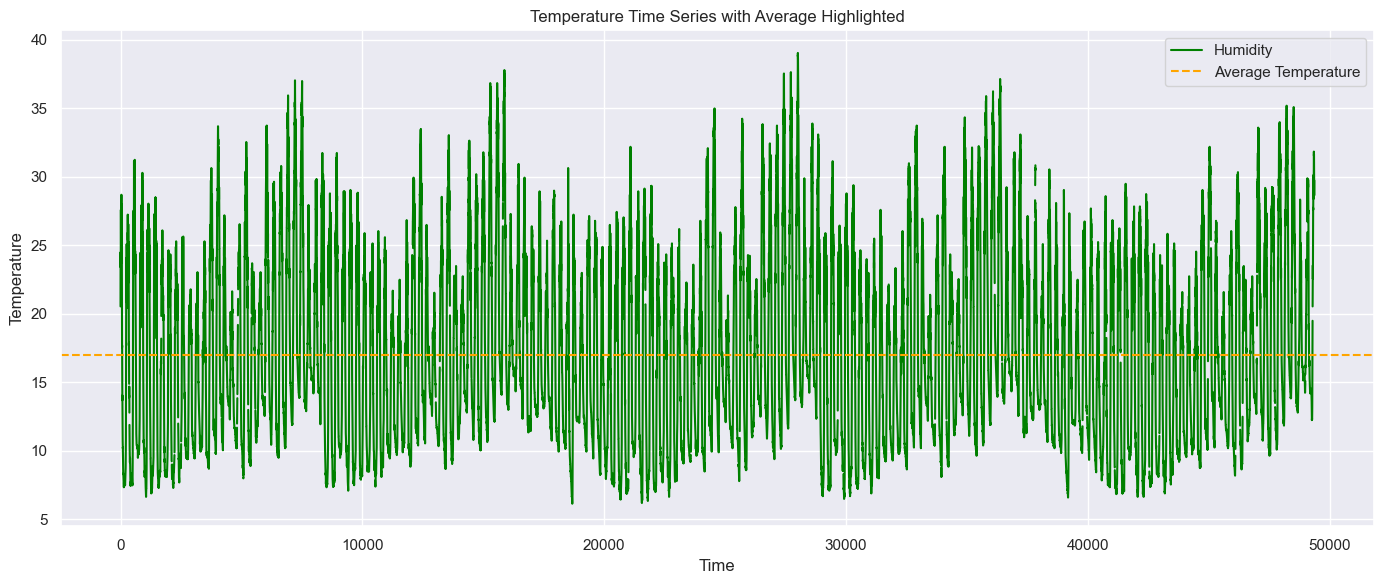

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average humidity
humi_average = df['temp'].mean()

# Plot humidity
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temp'], label='Humidity', color='green')
plt.axhline(humi_average, color='orange', linestyle='--', label='Average Temperature')
plt.title('Temperature Time Series with Average Highlighted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Group by sensor_id and find the maximum temperature and humidity
sensor_max = df.groupby('Sensor').agg({'temp': 'max', 'humi': 'max'}).reset_index()

print(sensor_max)


  Sensor   temp  humi
0   4750  35.20  92.7
1   4757  39.05  92.6
2  0474D  37.15  90.1
3  0475A  37.80  90.8
4  0475C  37.05  92.3


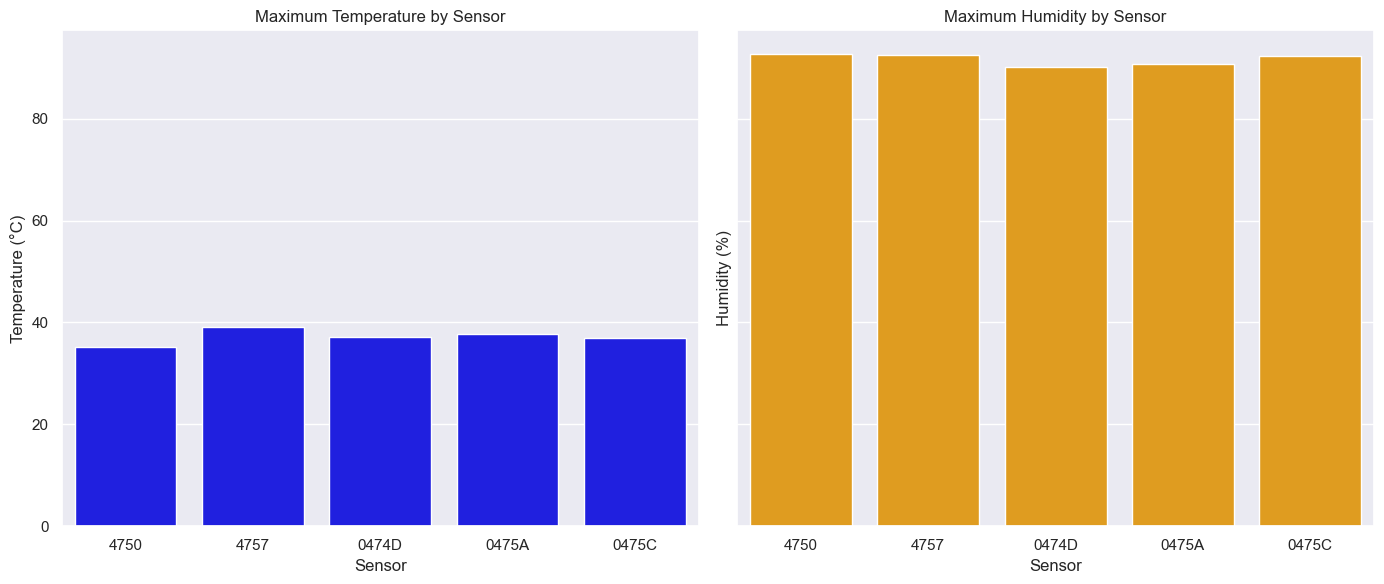

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Temperature
sns.barplot(x='Sensor', y='temp', data=sensor_max, color='blue', ax=ax1)
ax1.set_title('Maximum Temperature by Sensor')
ax1.set_xlabel('Sensor')
ax1.set_ylabel('Temperature (°C)')

# Plot Humidity
sns.barplot(x='Sensor', y='humi', data=sensor_max, color='orange', ax=ax2)
ax2.set_title('Maximum Humidity by Sensor')
ax2.set_xlabel('Sensor')
ax2.set_ylabel('Humidity (%)')

# Show plot
plt.tight_layout()
plt.show()
